<a href="https://colab.research.google.com/github/CM-007/pythonCode_DS/blob/main/EDA01(data_clean_csv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load the Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/data_clean.csv',index_col=0) # No index column

In [3]:
data.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S


In [4]:
data

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,67,5,1,2010,67,C
155,30.0,193.0,6.9,70,9,26,2010,70,PS
156,NaN,145.0,13.2,77,9,27,2010,77,S
157,14.0,191.0,14.3,75,9,28,2010,75,S


In [5]:
data.tail()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
154,41.0,190.0,7.4,67,5,1,2010,67,C
155,30.0,193.0,6.9,70,9,26,2010,70,PS
156,NaN,145.0,13.2,77,9,27,2010,77,S
157,14.0,191.0,14.3,75,9,28,2010,75,S
158,18.0,131.0,8.0,76,9,29,2010,76,C


In [6]:
data.shape

(158, 9)

In [7]:
# Data structure
type(data)

pandas.core.frame.DataFrame

In [8]:
# Data Types
data.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [9]:
data.describe()

,Ozone,Solar.R,Wind,Day,Year,Temp
count,120.000000,151.000000,158.000000,158.000000,158.0,158.000000
mean,41.583333,185.403974,9.957595,16.006329,2010.0,77.727848
std,32.620709,88.723103,3.511261,8.997166,0.0,9.377877
min,1.000000,7.000000,1.700000,1.000000,2010.0,56.000000
25%,18.000000,119.000000,7.400000,8.000000,2010.0,72.000000
50%,30.500000,197.000000,9.700000,16.000000,2010.0,78.500000
75%,61.500000,257.000000,11.875000,24.000000,2010.0,84.000000
max,168.000000,334.000000,20.700000,31.000000,2010.0,97.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 12.3+ KB


# **Data Type Converstion**

In [11]:
data.Month = pd.to_numeric(data.Month, errors='coerce')
# errors='coerce'--> if any category value there that convert into NA directly
data['Temp C'] = pd.to_numeric(data['Temp C'], errors='coerce')
data.Weather = data['Weather'].astype('category')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Temp C   157 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 11.4 KB


# **Duplicates**

In [13]:
data.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
154    False
155    False
156    False
157     True
158    False
Length: 158, dtype: bool

In [14]:
# count of duplicate recordes
data[data.duplicated()].shape

(1, 9)

In [15]:
# Print duplicated row
data[data.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
157,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [16]:
# Drop Duplicate record
data_cleaned1 = data.drop_duplicates()

In [17]:
data_cleaned1.shape

(157, 9)

# **Drop cloumns**

In [18]:
# Temp c = Temp

data_cleaned2 =data_cleaned1.drop('Temp C',axis=1)
# give axis=1 to drop column

In [19]:
data_cleaned2

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5.0,1,2010,67,S
2,36.0,118.0,8.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,5.0,3,2010,74,PS
4,18.0,313.0,11.5,5.0,4,2010,62,S
5,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9.0,30,2010,68,S
154,41.0,190.0,7.4,5.0,1,2010,67,C
155,30.0,193.0,6.9,9.0,26,2010,70,PS
156,NaN,145.0,13.2,9.0,27,2010,77,S


# **Rename the column**

In [20]:
data_cleaned3 = data_cleaned2.rename({'Solar.R':'Solar'},axis=1)

In [21]:
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5.0,1,2010,67,S
2,36.0,118.0,8.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,5.0,3,2010,74,PS
4,18.0,313.0,11.5,5.0,4,2010,62,S
5,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9.0,30,2010,68,S
154,41.0,190.0,7.4,5.0,1,2010,67,C
155,30.0,193.0,6.9,9.0,26,2010,70,PS
156,NaN,145.0,13.2,9.0,27,2010,77,S


# **Outlier Detection**

<Axes: >

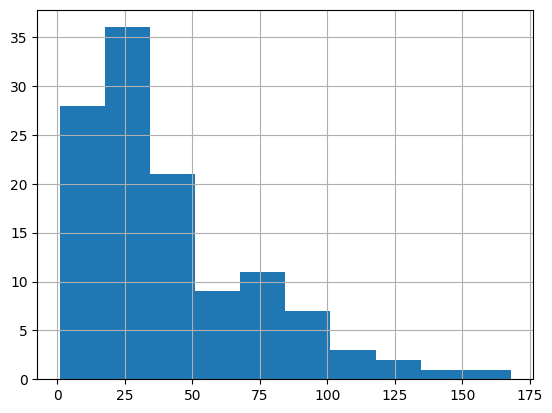

In [22]:
# Histogram of Ozone
data_cleaned3['Ozone'].hist()

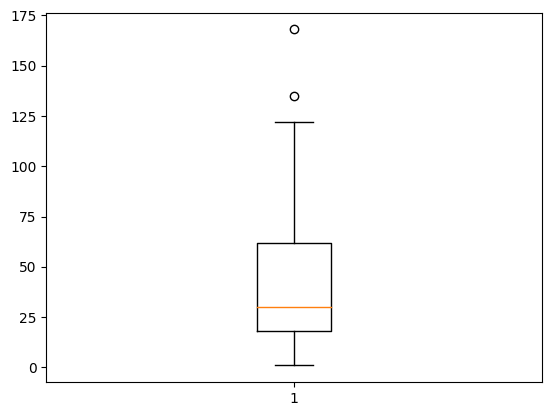

In [23]:
# Box Plot

data_box = data_cleaned3.dropna()
data_box1 =data_box.Ozone
plt.boxplot(data_box1)
plt.show()

Extract *outlier*

{'whiskers': [<matplotlib.lines.Line2D at 0x7bb16f536f50>,
 'caps': [<matplotlib.lines.Line2D at 0x7bb16f537370>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bb16f536cb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7bb16f5378b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bb16f537b50>],
 'means': []}

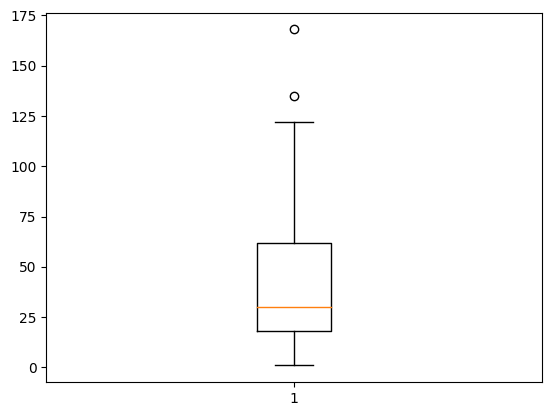

In [24]:
# Extracting outliers
box = plt.boxplot(data_box1)
box

In [25]:
[item.get_ydata() for item in box['fliers']] # get outlier value - get_ydata method use

[array([135., 168.])]

In [26]:
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5.0,1,2010,67,S
2,36.0,118.0,8.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,5.0,3,2010,74,PS
4,18.0,313.0,11.5,5.0,4,2010,62,S
5,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9.0,30,2010,68,S
154,41.0,190.0,7.4,5.0,1,2010,67,C
155,30.0,193.0,6.9,9.0,26,2010,70,PS
156,NaN,145.0,13.2,9.0,27,2010,77,S


In [27]:
# unique values find
data['Weather'].value_counts()

S     59
C     49
PS    47
Name: Weather, dtype: int64

<Axes: >

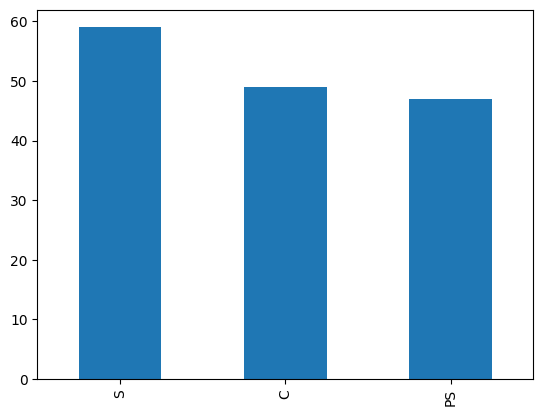

In [28]:
data['Weather'].value_counts().plot.bar()

# **Missing Values  and Imputaion**

In [29]:
import seaborn as sns

<Axes: >

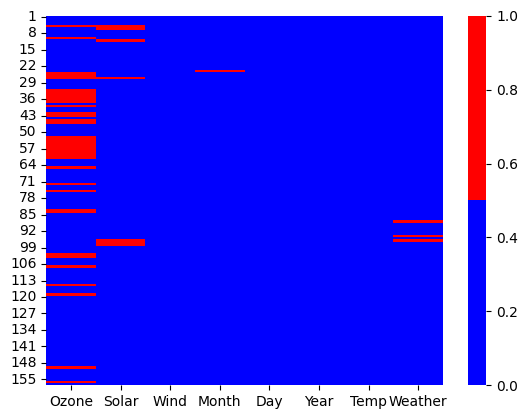

In [30]:
cols = data_cleaned3.columns
colours = ['Blue','Red']

sns.heatmap(data_cleaned3[cols].isnull(),
            cmap=sns.color_palette(colours)
            )

In [32]:
data_cleaned3.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [ ]:
# Mean Imputation
